# Fine-tuning using Grid Search and sklearn

**Dataset Context:**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
Content

The dataset consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Features:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

Label:
- Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

**References:**
- https://www.kaggle.com/uciml/pima-indians-diabetes-database
- https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [1]:
import os
os.chdir(os.path.join(os.getcwd(), os.pardir))

In [2]:
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# tensorflow and related layers
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.constraints import MaxNorm

from sklearn.model_selection import GridSearchCV

# progress status
from tqdm.notebook import tqdm

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
url = "https://raw.githubusercontent.com/tzamalisp/dev_tasks/master/datasets/pima-indians-diabetes.csv"
data = pd.read_csv(url)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Function to create the model, required for KerasClassifier

In [5]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Split into features (X) and labels (y) variables

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
X = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
          "BMI", "DiabetesPedigreeFunction", "Age"]]
y = data["Outcome"]

## Tune Batch Size and Number of Epochs

### Create the model with the KerasClassifier

In [8]:
clf_params = {
    "validation_split": 0.2,
    "shuffle": True,
    "use_multiprocessing": True,
    "verbose": 0
}

In [9]:
model = KerasClassifier(build_fn=create_model)

In [10]:
model.set_params(**clf_params)

In [11]:
model.get_params()

{'validation_split': 0.2,
 'shuffle': True,
 'use_multiprocessing': True,
 'verbose': 0,
 'build_fn': <function __main__.create_model()>}

### Define the Grid Search parameters

In [12]:
param_grid = {
    "batch_size": [10, 20, 40, 60, 80, 100],
    "epochs": [10, 50, 100]
}

### Initiate and train the Grid Search classifier

In [13]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [14]:
classifier = grid.fit(X, y)

### Summarize the results

In [15]:
print("Best accuracy: %.2f" % classifier.best_score_)
print("Best parameters for training: %s" % classifier.best_params_)

Best accuracy: 0.69
Best parameters for training: {'batch_size': 10, 'epochs': 100}


In [16]:
means = classifier.cv_results_['mean_test_score']
stds = classifier.cv_results_['std_test_score']
params = classifier.cv_results_['params']

In [17]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.631510 (0.023939) with: {'batch_size': 10, 'epochs': 10}
0.670573 (0.015073) with: {'batch_size': 10, 'epochs': 50}
0.692708 (0.021236) with: {'batch_size': 10, 'epochs': 100}
0.572917 (0.022628) with: {'batch_size': 20, 'epochs': 10}
0.647135 (0.031304) with: {'batch_size': 20, 'epochs': 50}
0.684896 (0.010253) with: {'batch_size': 20, 'epochs': 100}
0.588542 (0.062364) with: {'batch_size': 40, 'epochs': 10}
0.647135 (0.034104) with: {'batch_size': 40, 'epochs': 50}
0.658854 (0.030145) with: {'batch_size': 40, 'epochs': 100}
0.552083 (0.011201) with: {'batch_size': 60, 'epochs': 10}
0.565104 (0.027126) with: {'batch_size': 60, 'epochs': 50}
0.651042 (0.061045) with: {'batch_size': 60, 'epochs': 100}
0.523438 (0.089475) with: {'batch_size': 80, 'epochs': 10}
0.628906 (0.069072) with: {'batch_size': 80, 'epochs': 50}
0.623698 (0.026557) with: {'batch_size': 80, 'epochs': 100}
0.595052 (0.048824) with: {'batch_size': 100, 'epochs': 10}
0.611979 (0.009744) with: {'batch_size': 100, 'epo

## Tune the Training Optimization Algorithm

Tune the optimization algorithm used to train the network, each with default parameters. Usually, one approach a priori will be chosen and focus will take place on tuning its parameters on the relevant problem, as shown in the next section.

Add the `optimizer` argument in order to set the relevant grid parameters on Grid Search:

In [18]:
def create_model(optimizer="adam"):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

Add the best parameters from the above `fit()` method's hyperparamter tuning:

In [19]:
clf_params = {
    "epochs": 100,
    "batch_size": 10,
    "validation_split": 0.2,
    "shuffle": True,
    "use_multiprocessing": True,
    "verbose": 0
}

In [20]:
model = KerasClassifier(build_fn=create_model)

In [21]:
model.set_params(**clf_params)

In [22]:
model.get_params()

{'epochs': 100,
 'batch_size': 10,
 'validation_split': 0.2,
 'shuffle': True,
 'use_multiprocessing': True,
 'verbose': 0,
 'build_fn': <function __main__.create_model(optimizer='adam')>}

In [23]:
param_grid = {
    "optimizer": ["SGD", "RMSprop", "Adagrad", "Adadelta", "Adam", "Adamax", "Nadam"]
}

In [24]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [25]:
classifier = grid.fit(X, y)

In [26]:
print("Best accuracy: %.2f" % classifier.best_score_)
print("Best parameters for training: %s" % classifier.best_params_)


means = classifier.cv_results_['mean_test_score']
stds = classifier.cv_results_['std_test_score']
params = classifier.cv_results_['params']

print()
print("Means, STDs, and Parameters for each grid combination:")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best accuracy: 0.71
Best parameters for training: {'optimizer': 'Adam'}

Means, STDs, and Parameters for each grid combination:
0.664062 (0.027805) with: {'optimizer': 'SGD'}
0.699219 (0.027621) with: {'optimizer': 'RMSprop'}
0.619792 (0.031466) with: {'optimizer': 'Adagrad'}
0.434896 (0.145612) with: {'optimizer': 'Adadelta'}
0.713542 (0.020752) with: {'optimizer': 'Adam'}
0.677083 (0.014382) with: {'optimizer': 'Adamax'}
0.705729 (0.001841) with: {'optimizer': 'Nadam'}


## Tune the Learning Rate and Momentum

**Optimizing the SGD learning rate and momentum parameters.**

Learning rate controls how much to update the weight at the end of each batch and the momentum controls how much to let the previous update influence the current weight update.

It is a good idea to include the number of epochs in an optimization like this as there is a dependency between the amount of learning per batch (learning rate), the number of updates per epoch (batch size) and the number of epochs.

Add the `learning_rate` and the `momentum` arguments which correspond to the `optimizer`, in order to set the relevant grid parameters on Grid Search:

In [27]:
def create_model(learning_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Set the SGD optimizer and Compile the model
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

Add the best parameters from the first `fit()` method's hyperparamter tuning:

In [28]:
clf_params = {
    "epochs": 100,
    "batch_size": 10,
    "validation_split": 0.2,
    "shuffle": True,
    "use_multiprocessing": True,
    "verbose": 0
}

In [29]:
model = KerasClassifier(build_fn=create_model)

In [30]:
model.set_params(**clf_params)

In [31]:
model.get_params()

{'epochs': 100,
 'batch_size': 10,
 'validation_split': 0.2,
 'shuffle': True,
 'use_multiprocessing': True,
 'verbose': 0,
 'build_fn': <function __main__.create_model(learning_rate=0.01, momentum=0)>}

Try a suite of small standard learning rates and a momentum values from 0.2 to 0.8 in steps of 0.2, as well as 0.9 (because it can be a popular value in practice).

In [32]:
param_grid = {
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.3],
    "momentum": [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
}

In [33]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [34]:
classifier = grid.fit(X, y)

In [35]:
print("Best accuracy: %.2f" % classifier.best_score_)
print("Best parameters for training: %s" % classifier.best_params_)


means = classifier.cv_results_['mean_test_score']
stds = classifier.cv_results_['std_test_score']
params = classifier.cv_results_['params']

print()
print("Means, STDs, and Parameters for each grid combination:")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best accuracy: 0.68
Best parameters for training: {'learning_rate': 0.01, 'momentum': 0.0}

Means, STDs, and Parameters for each grid combination:
0.654948 (0.043537) with: {'learning_rate': 0.001, 'momentum': 0.0}
0.673177 (0.006639) with: {'learning_rate': 0.001, 'momentum': 0.2}
0.679688 (0.014616) with: {'learning_rate': 0.001, 'momentum': 0.4}
0.673177 (0.029635) with: {'learning_rate': 0.001, 'momentum': 0.6}
0.674479 (0.023510) with: {'learning_rate': 0.001, 'momentum': 0.8}
0.657552 (0.029635) with: {'learning_rate': 0.001, 'momentum': 0.9}
0.683594 (0.011500) with: {'learning_rate': 0.01, 'momentum': 0.0}
0.652344 (0.026107) with: {'learning_rate': 0.01, 'momentum': 0.2}
0.660156 (0.030758) with: {'learning_rate': 0.01, 'momentum': 0.4}
0.649740 (0.026557) with: {'learning_rate': 0.01, 'momentum': 0.6}
0.648438 (0.028348) with: {'learning_rate': 0.01, 'momentum': 0.8}
0.651042 (0.024774) with: {'learning_rate': 0.01, 'momentum': 0.9}
0.649740 (0.026557) with: {'learning_rate':

## Tune the Network Weight Initialization

**Use small random values.**

Here, the same weight initialization method on each layer is used. Rectifier for the hidden layer is used, and the sigmoid for the output layer because the predictions are binary.

Ideally, it may be better to use different weight initialization schemes according to the activation function used on each layer.

Check the initializers from the **Keras API**:

- https://keras.io/api/layers/initializers/

Add the `initilization_mode` argument in the layers' `kernel_initializer` in order to set the relevant grid parameters on Grid Search:

In [36]:
def create_model(initilization_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=initilization_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=initilization_mode, activation='sigmoid'))
    # Set the SGD optimizer and Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Add the best parameters from the first `fit()` method's hyperparamter tuning:

In [37]:
clf_params = {
    "epochs": 100,
    "batch_size": 10,
    "validation_split": 0.2,
    "shuffle": True,
    "use_multiprocessing": True,
    "verbose": 0
}

In [38]:
model = KerasClassifier(build_fn=create_model)

In [39]:
model.set_params(**clf_params)

In [40]:
model.get_params()

{'epochs': 100,
 'batch_size': 10,
 'validation_split': 0.2,
 'shuffle': True,
 'use_multiprocessing': True,
 'verbose': 0,
 'build_fn': <function __main__.create_model(initilization_mode='uniform')>}

Set up the various initializers:

In [41]:
param_grid = {
    "initilization_mode": ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 
                           'glorot_uniform', 'he_normal', 'he_uniform']
}

In [42]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [43]:
classifier = grid.fit(X, y)

In [44]:
print("Best accuracy: %.2f" % classifier.best_score_)
print("Best parameters for training: %s" % classifier.best_params_)


means = classifier.cv_results_['mean_test_score']
stds = classifier.cv_results_['std_test_score']
params = classifier.cv_results_['params']

print()
print("Means, STDs, and Parameters for each grid combination:")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best accuracy: 0.72
Best parameters for training: {'initilization_mode': 'normal'}

Means, STDs, and Parameters for each grid combination:
0.712240 (0.009744) with: {'initilization_mode': 'uniform'}
0.696615 (0.014731) with: {'initilization_mode': 'lecun_uniform'}
0.721354 (0.008027) with: {'initilization_mode': 'normal'}
0.651042 (0.024774) with: {'initilization_mode': 'zero'}
0.695312 (0.009568) with: {'initilization_mode': 'glorot_normal'}
0.697917 (0.018688) with: {'initilization_mode': 'glorot_uniform'}
0.694010 (0.019488) with: {'initilization_mode': 'he_normal'}
0.682292 (0.030978) with: {'initilization_mode': 'he_uniform'}


## Tune the Neuron Activation Function

Generally, the rectifier activation function is the most popular (which is initialized here), but in the past it used to be the sigmoid and the tanh functions and these functions may still be more suitable for different problems.

Evaluate the suite of different activation functions available in Keras. These functions will be only used in the hidden layer, as a sigmoid activation function is required in the output for the binary classification problem.

Generally, it is a good idea to prepare data to the range of the different transfer functions, which we will not do in this case.

Activation functions in Keras:

- https://keras.io/api/layers/activations/

Add the `activation` argument in order to set the relevant grid parameters on Grid Search:

In [45]:
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation=activation))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Add the best parameters from the first `fit()` method's hyperparamter tuning:

In [46]:
clf_params = {
    "epochs": 100,
    "batch_size": 10,
    "validation_split": 0.2,
    "shuffle": True,
    "use_multiprocessing": True,
    "verbose": 0
}

In [47]:
model = KerasClassifier(build_fn=create_model)

In [48]:
model.set_params(**clf_params)

In [49]:
model.get_params()

{'epochs': 100,
 'batch_size': 10,
 'validation_split': 0.2,
 'shuffle': True,
 'use_multiprocessing': True,
 'verbose': 0,
 'build_fn': <function __main__.create_model(activation='relu')>}

Set up the various initializers:

In [50]:
param_grid = {
    "activation": ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
}

In [51]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [52]:
classifier = grid.fit(X, y)

In [53]:
print("Best accuracy: %.2f" % classifier.best_score_)
print("Best parameters for training: %s" % classifier.best_params_)


means = classifier.cv_results_['mean_test_score']
stds = classifier.cv_results_['std_test_score']
params = classifier.cv_results_['params']

print()
print("Means, STDs, and Parameters for each grid combination:")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best accuracy: 0.74
Best parameters for training: {'activation': 'softplus'}

Means, STDs, and Parameters for each grid combination:
0.649740 (0.023510) with: {'activation': 'softmax'}
0.738281 (0.024080) with: {'activation': 'softplus'}
0.679688 (0.033754) with: {'activation': 'softsign'}
0.730469 (0.011049) with: {'activation': 'relu'}
0.713542 (0.010253) with: {'activation': 'tanh'}
0.699219 (0.013902) with: {'activation': 'sigmoid'}
0.660156 (0.036782) with: {'activation': 'hard_sigmoid'}
0.709635 (0.010253) with: {'activation': 'linear'}


## Tune the Dropout Regularization

Tune dropout in an effort to limit overfitting and improve the model’s ability to generalize. *To get good results, dropout is best combined with a weight constraint such as the max norm constraint.* This involves fitting both the dropout percentage and the weight constraint. 

Try dropout percentages between 0.0 and 0.9 (1.0 does not make sense) and maxnorm weight constraint values between 0 and 5.

Add the `dropout_rate` and `weight_constraint` arguments in order to set the relevant grid parameters on Grid Search:

In [54]:
def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='linear', 
                    kernel_constraint=MaxNorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Add the best parameters from the first `fit()` method's hyperparamter tuning:

In [55]:
clf_params = {
    "epochs": 100,
    "batch_size": 10,
    "validation_split": 0.2,
    "shuffle": True,
    "use_multiprocessing": True,
    "verbose": 0
}

In [56]:
model = KerasClassifier(build_fn=create_model)

In [57]:
model.set_params(**clf_params)

In [58]:
model.get_params()

{'epochs': 100,
 'batch_size': 10,
 'validation_split': 0.2,
 'shuffle': True,
 'use_multiprocessing': True,
 'verbose': 0,
 'build_fn': <function __main__.create_model(dropout_rate=0.0, weight_constraint=0)>}

Set up the various initializers:

In [59]:
param_grid = {
    "weight_constraint": [1, 2, 3, 4, 5],
    "dropout_rate": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

In [60]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [61]:
classifier = grid.fit(X, y)

In [62]:
print("Best accuracy: %.2f" % classifier.best_score_)
print("Best parameters for training: %s" % classifier.best_params_)


means = classifier.cv_results_['mean_test_score']
stds = classifier.cv_results_['std_test_score']
params = classifier.cv_results_['params']

print()
print("Means, STDs, and Parameters for each grid combination:")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best accuracy: 0.73
Best parameters for training: {'dropout_rate': 0.1, 'weight_constraint': 2}

Means, STDs, and Parameters for each grid combination:
0.730469 (0.024080) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.717448 (0.012075) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.718750 (0.005524) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.726562 (0.030758) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.720052 (0.011201) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.708333 (0.012075) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.733073 (0.019225) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.714844 (0.016877) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.713542 (0.007366) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.703125 (0.022326) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.729167 (0.024360) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.718750 (0.020915) with: {'dropout_rate': 0.2, 'weight_

## Tune the Number of Neurons in the Hidden Layer

**Tuning the number of neurons in a single hidden layer.**

The number of neurons in a layer is an important parameter to tune. Generally, the number of neurons in a layer controls the representational capacity of the network, at least at that point in the topology. Also, a large enough single layer network could approximate any other neural network.

A larger network requires more training and at least the batch size and number of epochs should ideally be optimized with the number of neurons.

Add the `neurons` argument in order to set the relevant grid parameters on Grid Search:

In [63]:
def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=8, kernel_initializer='uniform', activation='linear', 
                    kernel_constraint=MaxNorm(4)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Add the best parameters from the first `fit()` method's hyperparamter tuning:

In [64]:
clf_params = {
    "epochs": 100,
    "batch_size": 10,
    "validation_split": 0.2,
    "shuffle": True,
    "use_multiprocessing": True,
    "verbose": 0
}

In [65]:
model = KerasClassifier(build_fn=create_model)

In [66]:
model.set_params(**clf_params)

In [67]:
model.get_params()

{'epochs': 100,
 'batch_size': 10,
 'validation_split': 0.2,
 'shuffle': True,
 'use_multiprocessing': True,
 'verbose': 0,
 'build_fn': <function __main__.create_model(neurons=1)>}

Set up the values from 1 to 30 in steps of 5:

In [68]:
param_grid = {
    "neurons": [1, 5, 10, 15, 20, 25, 30]
}

In [69]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [70]:
classifier = grid.fit(X, y)

In [71]:
print("Best accuracy: %.2f" % classifier.best_score_)
print("Best parameters for training: %s" % classifier.best_params_)


means = classifier.cv_results_['mean_test_score']
stds = classifier.cv_results_['std_test_score']
params = classifier.cv_results_['params']

print()
print("Means, STDs, and Parameters for each grid combination:")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best accuracy: 0.73
Best parameters for training: {'neurons': 10}

Means, STDs, and Parameters for each grid combination:
0.699219 (0.027805) with: {'neurons': 1}
0.699219 (0.019401) with: {'neurons': 5}
0.727865 (0.032264) with: {'neurons': 10}
0.688802 (0.001841) with: {'neurons': 15}
0.718750 (0.014616) with: {'neurons': 20}
0.714844 (0.022999) with: {'neurons': 25}
0.718750 (0.028348) with: {'neurons': 30}


# Weight Initialization

Weight initialization is an important design choice when developing deep learning neural network models. Tailored heuristics can result in more effective training of neural network models using the stochastic gradient descent optimization algorithm. These techniques have become the defacto standard given they may result in a slightly more effective optimization (model training) process.

Each time, a neural network is initialized with a different set of weights, resulting in a different starting point for the optimization process, and potentially resulting in a different final set of weights with different performance characteristics.

We cannot initialize all weights to the value 0.0 as the optimization algorithm results in some asymmetry in the error gradient to begin searching effectively.

These modern weight initialization techniques are divided based on the type of activation function used in the nodes that are being initialized, such as “Sigmoid and Tanh” and “ReLU.”

Historically, weight initialization follows simple heuristics, such as:

- Small random values in the range [-0.3, 0.3]
- Small random values in the range [0, 1]
- Small random values in the range [-1, 1]


**References:**
- https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/

In [72]:
from math import sqrt
from numpy import mean
from numpy.random import rand, randn

## Xavier initialization for Sigmoid and Tanh

- 10 inputs to a node
- calculate the lower and upper bounds of the range
- calculate 1,000 initial weight values that could be used for the nodes in a layer or a network that uses the sigmoid or tanh activation function.

*The Xavier initialization method is calculated as a random number with a uniform probability distribution (U) between the range -(1/sqrt(n)) and 1/sqrt(n), where n is the number of inputs to the node.*

    weight = U [-(1/sqrt(n)), 1/sqrt(n)]


Calculate the weights, the lower and upper bounds are printed as are the min, max, mean, and standard deviation of the generated weights.

In [73]:
# number of nodes in the previous layer
n = 10
# calculate the range for the weights
lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n))
# generate random numbers
numbers = rand(1000)
# scale to the desired range
scaled = lower + numbers * (upper - lower)
# summarize
print("Weights calculation:")
print("Lower bound: {} - Upper bound: {} ".format(lower, upper))
print("Min: {} - Max: {}".format(scaled.min(), scaled.max()))
print("Mean: {} - STD: {}".format(scaled.mean(), scaled.std()))

Weights calculation:
Lower bound: -0.31622776601683794 - Upper bound: 0.31622776601683794 
Min: -0.3132982174430696 - Max: 0.31604920692481037
Mean: -0.006162296753756642 - STD: 0.1846714856250318


#### How the spread of the weights changes with the number of inputs

Calculate the bounds on the weight initialization with different numbers of inputs from 1 to 100 and plot the result.

Range of weights with different numbers of input values:

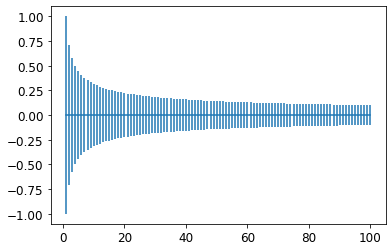

In [74]:
# define the number of inputs from 1 to 100
values = [i for i in range(1, 101)]
# calculate the range for each number of inputs
results = [1.0 / sqrt(n) for n in values]
# create an error bar plot centered on 0 for each number of inputs
plt.errorbar(values, [0.0 for _ in values], yerr=results)
plt.show()

With very few inputs, the range is large, such as between -1 and 1 or -0.7 to -7. The range rapidly drops to about 20 weights to near -0.1 and 0.1, where it remains reasonably constant.

## Normalized Xavier initialization for Sigmoid and Tanh

- 10 inputs to a node
- 20 nodes in the current layer
- calculate the lower and upper bounds of the range
- calculate 1,000 initial weight values that could be used for the nodes in a layer or a network that uses the sigmoid or tanh activation function.

*The Normalized Xavier initialization method is calculated as a random number with a uniform probability distribution (U) between the range -(sqrt(6)/sqrt(n + m)) and sqrt(6)/sqrt(n + m), where n us the number of inputs to the node (e.g. number of nodes in the previous layer) and m is the number of outputs from the layer (e.g. number of nodes in the current layer).*

    weight = U [-(sqrt(6)/sqrt(n + m)), sqrt(6)/sqrt(n + m)]


Same inputs as before, and summarize the statistical summary of 1,000 generated weights:

In [75]:
# number of nodes in the previous layer
n = 10
# number of nodes in the next layer
m = 20
# calculate the range for the weights
lower, upper = -(sqrt(6.0) / sqrt(n + m)), (sqrt(6.0) / sqrt(n + m))
# generate random numbers
numbers = rand(1000)
# scale to the desired range
scaled = lower + numbers * (upper - lower)
# summarize
print("Weights calculation:")
print("Lower bound: {} - Upper bound: {} ".format(lower, upper))
print("Min: {} - Max: {}".format(scaled.min(), scaled.max()))
print("Mean: {} - STD: {}".format(scaled.mean(), scaled.std()))

Weights calculation:
Lower bound: -0.44721359549995787 - Upper bound: 0.44721359549995787 
Min: -0.44433509302448565 - Max: 0.4466892158878595
Mean: 0.00627646855982425 - STD: 0.2612118816181846


The bounds of the weight values are about -0.447 and 0.447. These bounds would become wider with fewer inputs and more narrow with more inputs.

#### How the spread of the weights changes with the number of inputs

Calculate the bounds on the weight initialization with different numbers of inputs from 1 to 100 and a fixed number of 10 outputs and plot the result.

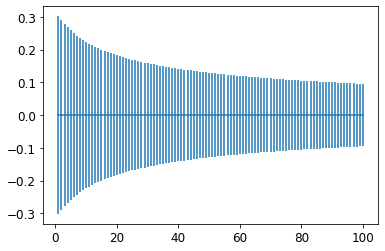

In [76]:
# define the number of inputs from 1 to 100
values = [i for i in range(1, 101)]
# define the number of outputs
m = 10
# calculate the range for each number of inputs
results = [1.0 / sqrt(n + m) for n in values]
# create an error bar plot centered on 0 for each number of inputs
plt.errorbar(values, [0.0 for _ in values], yerr=results)
plt.show()

The range starts wide at about -0.3 to 0.3 with few inputs and reduces to about -0.1 to 0.1 as the number of inputs increases. Compared to the non-normalized version in the previous section, the range is initially smaller, although transitions to the compact range at a similar rate.

## He initialization for ReLU

The “xavier” weight initialization was found to have problems when used to initialize networks that use the **rectified linear (ReLU)** activation function. Thus, the **“he” initialization** was developed specifically for nodes and layers that use ReLU activation, popular in the hidden layers of the most **multilayer Perceptron** and the **convolutional neural network** models.

- 10 inputs to a node
- calculate the standard deviation of the Gaussian distribution 
- calculate 1,000 initial weight values that could be used for the nodes in a layer or a network that uses the ReLU activation function.

*The He initialization method is calculated as a random number with a Gaussian probability distribution (G) with a mean of 0.0 and a standard deviation of sqrt(2/n), where n is the number of inputs to the node.*

    weight = G (0.0, sqrt(2/n))

Calculate the min, max, mean, and standard deviation of the generated weights.

In [77]:
# number of nodes in the previous layer
n = 10
# calculate the range for the weights
std = sqrt(2.0 / n)
# generate random numbers
numbers = randn(1000)
# scale to the desired range
scaled = numbers * std
# summarize
print("Weights calculation:")
print("Gaussian Probability Distribution: {} ".format(std))
print("Min: {} - Max: {}".format(scaled.min(), scaled.max()))
print("Mean: {} - STD: {}".format(scaled.mean(), scaled.std()))

Weights calculation:
Gaussian Probability Distribution: 0.4472135954999579 
Min: -1.3503668878604604 - Max: 1.428001116234026
Mean: 0.005781498950566694 - STD: 0.43722277036973006


The bound of the calculated standard deviation of the weights is about 0.447. This standard deviation would become larger with fewer inputs and smaller with more inputs. 

The range of the weights is close to the theoretical range of about -1.788 and 1.788, which is four times the standard deviation, capturing 99.7% of observations in the Gaussian distribution. 

The mean and standard deviation of the generated weights are close to the prescribed 0.0 and 0.447 respectively.

#### How the spread of the weights changes with the number of inputs.

Calculate the bounds on the weight initialization with different numbers of inputs from 1 to 100 and plot the result.

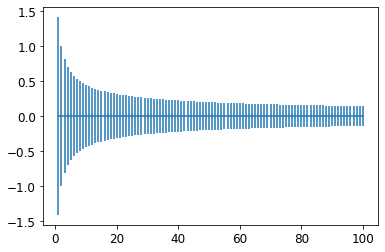

In [78]:
# define the number of inputs from 1 to 100
values = [i for i in range(1, 101)]
# calculate the range for each number of inputs
results = [sqrt(2.0 / n) for n in values]
# create an error bar plot centered on 0 for each number of inputs
plt.errorbar(values, [0.0 for _ in values], yerr=results)
plt.show()

With very few inputs, the range is large, near -1.5 and 1.5 or -1.0 to -1.0.

The range rapidly drops to about 20 weights to near -0.1 and 0.1, where it remains reasonably constant.